# Lifestyle and Depression dataset

## Scenario

A school director wants to find out how the overall status in mental health (-> depression) is at his school, especially in comparison to other schools.

There may be many possible reasons related to depression of school children, so in this notebook, variables can be selected to analyze and identify possible correlations inside the director's school as well as how the variables compare to the other schools.

In this example, we use the "lifestyle and depression" dataset (available here: https://github.com/mehedimamun/Lifestyle-and-Depression-Among-University-Students/) and demonstrate the case for the variables "depression" and "study hours".

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("depression.csv")
df = df.dropna()
df.head()

,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,exercise,meditation,video_games,study_hours,phone_hours,medication,movies_per_week,music hours,depression,category
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,Not at all,Not at all,Not at all,2,6 to 8,No,0,0,18,Moderate
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,Regularly,Sometimes,Sometimes,4,0 to 2,No,5,0,1,None
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,Sometimes,Not at all,Not at all,3,6 to 8,No,0,0,21,Severe
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,Not at all,Not at all,Very Often,1,0 to 2,No,5,0,23,Severe
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,Sometimes,Not at all,Very Often,2,6 to 8,No,1,4,19,Moderate


## Umwandlung in Schüler

In [6]:
df['subject'].value_counts().tail(60)

Microbiology                                 4
Microbiology                                 3
Biochemistry                                 3
Biochemistry and Biotechnology               3
Botany                                       2
Biochemistry                                 2
Biochemistry and Biotechnology               2
College                                      2
International Relations                      2
Mathematics                                  1
Environment Management                       1
Social work                                  1
BPT                                          1
Political Science                            1
Biotechnology and biochemistry               1
Biochemistry and biotechnology               1
Environmental science and management         1
HSC 20                                       1
TESOL                                        1
Honours                                      1
life sciences                                1
Genetic Engin

In [43]:
# Unify subjects
subjects = df['subject'].to_numpy()

for i in range(0, len(subjects)):
    current = str.lower(subjects[i])
    if "bio" in current or "arch" in current or "botan" in current or "engin" in current or "math" in current or "pharm" in current or "science" in current or "it" in current or "phys" in current:
        subjects[i] = "Naturwissenschaft"
    if "econ" in current or "financ" in current or "business" in current or "management" in current or "market" in current:
        subjects[i] = "Wirtschaft"
    if "polit" in current or "social" in current or "english" in current or "linguist" in current or "geo" in current or "law" in current or "international" in current or "crimin" in current:
        subjects[i] = "Geisteswissenschaft"
    if "art" in current:
        subjects[i] = "Kunst"
        
subjectsnew = np.array([])
for i in range(0, len(subjects)):
    if subjects[i] in ['Naturwissenschaft', 'Wirtschaft', 'Geisteswissenschaft', 'Kunst']:
        subjectsnew = np.append(subjectsnew, subjects[i])

print(str(len(subjectsnew)) + " from initially " + str(len(subjects)) + " students remaining.")

700 from initially 752 students remaining.


In [44]:
# Select interesting variables

varX = 'depression'
varY = 'study_hours'

dfinterest = df[[varX, varY]].copy()

# Simple transformation may be done here
#

dfinterest.head()

,depression,study_hours
0,18,2
1,1,4
2,21,3
3,23,1
4,19,2


Text(0, 0.5, 'study_hours')

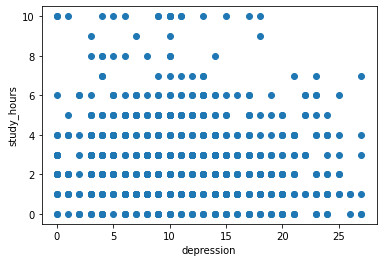

In [45]:
# Plot raw data from the selected variables

plt.scatter(df[varX], df[varY])
plt.xlabel(varX)
plt.ylabel(varY)

In [54]:
# Get mean and standard deviation for the selected variables

meanX = df[varX].mean()
stdX = df[varX].std()
meanY = df[varY].mean()
stdY = df[varY].std()

print("Mean " + varX + ": " + str(meanX))
print("Std " + varX + ": " + str(stdX))
print("Mean " + varX + ": " + str(meanY))
print("Std " + varX + ": " + str(stdY))

Mean depression: 11.196808510638299
Std depression: 6.309048343390235
Mean depression: 2.7952127659574466
Std depression: 2.199885835906468


In [131]:
# Generate more samples with simulation
import statistics as stats

number_samples = 50000

objX = stats.NormalDist(mu=meanX, sigma=stdX) # variable X
objY = stats.NormalDist(mu=meanY, sigma=stdY) # variable Y
gensamplesX = objX.samples(number_samples, seed=1)
gensamplesY = objY.samples(number_samples, seed=1)

# If only integers are valid, round the values
gensamplesX = np.around(gensamplesX).astype(int)
gensamplesY = np.around(gensamplesY).astype(int)

# Concatenate with real data
samplesX = np.concatenate((df[varX].to_numpy(), gensamplesX))
samplesY = np.concatenate((df[varY].to_numpy(), gensamplesY))

# Randomize each value a little bit
np.random.seed(1)
randX = np.random.uniform(0.75,1.25,len(samplesX))
randY = np.random.uniform(0.75,1.25,len(samplesY))
randizedX = np.array([])
randizedY = np.array([])

for i in range(0, len(samplesX)):
    randizedX = np.append(randizedX, samplesX[i]*randX[i])
    randizedY = np.append(randizedY, samplesY[i]*randY[i])
    
samplesX = randizedX
samplesY = randizedY
    
# Shuffle
np.random.shuffle(samplesX)
np.random.shuffle(samplesY)
    
print(len(samplesX))
print(len(samplesY))

50752
50752


In [132]:
# Define and remove impossible values

maxX = 63
minX = 0
maxY = None
minY = 0

removal_counter = 0
newsamplesX = np.array([])
newsamplesY = np.array([])

# Find impossible values in variable X samples
for i in range(0, len(samplesX)):
    if samplesX[i] >= minX and samplesX[i] <= maxX and samplesY[i] >= minY:
        #samplesX = np.delete(samplesX, i)
        #samplesY = np.delete(samplesY, i) # also remove some entry from the other set of samples
        newsamplesX = np.append(newsamplesX, samplesX[i])
        newsamplesY = np.append(newsamplesY, samplesY[i])
    else:
        removal_counter += 1
    
print("Remaining samples: " + str(len(newsamplesX)) + ", " + str(len(newsamplesY)))

Remaining samples: 45962, 45962


### Divide samples into schools

In [133]:
# Define number of schools to be simulated

number_schools = 200

zipped_samples = np.column_stack((newsamplesX, newsamplesY))
schools = np.array_split(zipped_samples, number_schools)
schoolsX = np.array_split(newsamplesX, number_schools)
schoolsY = np.array_split(newsamplesY, number_schools)

In [134]:
len(schoolsX[0])

230

### Visualize data on one specific school

Text(0.5, 1.0, 'Raw visualization on school 1')

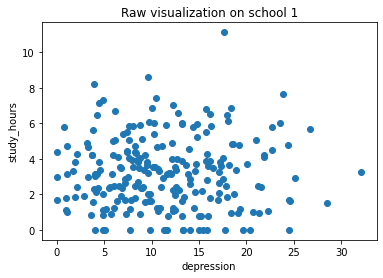

In [135]:
# Select some school
oneSchoolIndex = 1

# Plot that school's data
plt.scatter(schoolsX[oneSchoolIndex], schoolsY[oneSchoolIndex])
plt.xlabel(varX)
plt.ylabel(varY)
plt.title("Raw visualization on school " + str(oneSchoolIndex))

### Clustering on one specific school (student comparison)

In [136]:
# Normalize data of that school
from sklearn.preprocessing import StandardScaler
oneScaler = StandardScaler()
oneX = schools[oneSchoolIndex]
oneXscaled = oneScaler.fit_transform(oneX)

In [137]:
from sklearn.cluster import KMeans
number_clusters = 4

oneKmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(oneXscaled)

In [138]:
# Create dataframe for easier handling

onedf = pd.DataFrame(oneX, columns=[varX, varY])
onedf['label'] = oneKmeans.labels_
onedf.head()

,depression,study_hours,label
0,8.938663,2.379171,1
1,13.198199,3.902817,2
2,4.204563,6.463083,2
3,10.299391,5.377526,2
4,24.569742,1.640657,0


In [139]:
# Group by cluster into separate dataframes

oneClusters = list()
for i in range(0, number_clusters):
    oneClusters.append(onedf[onedf['label'] == i])

Mean depression: 11.371530532292718
Std depression: 6.231088779794578
Mean study_hours: 3.211954525456062
Std study_hours: 2.001866999225789


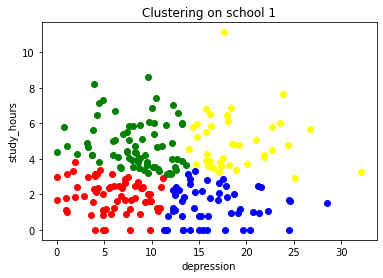

In [140]:
# Visualize one school clustering
colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'brown']

for i in range(0, number_clusters):
    plt.scatter(oneClusters[i][varX], oneClusters[i][varY], color=colors[i])
    
plt.xlabel(varX)
plt.ylabel(varY)
plt.title("Clustering on school " + str(oneSchoolIndex))
print("Mean " + varX + ": " + str(onedf[varX].mean()))
print("Std " + varX + ": " + str(onedf[varX].std()))
print("Mean " + varY + ": " + str(onedf[varY].mean()))
print("Std " + varY + ": " + str(onedf[varY].std()))

# Clustering over all schools (school comparison)

## By all students

In [141]:
# Define the schools that are part of the contract
contractSchoolsIndices = [0,1,2]

# Integrate their respective data
contractX = np.array([])
contractY = np.array([])

for i in range(0, np.max(contractSchoolsIndices)+1):
    if i in contractSchoolsIndices:
        print(i)
        for j in range(0, len(schoolsX[i])):
            contractX = np.append(contractX, schoolsX[i][j])
            contractY = np.append(contractY, schoolsY[i][j])

0
1
2


In [142]:
# Normalize data
contractScaler = StandardScaler()
brokerX = np.column_stack((contractX, contractY))
brokerXscaled = contractScaler.fit_transform(brokerX)

In [143]:
# Perform clustering
number_clusters = 4

brokerKmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(brokerXscaled)

In [144]:
# Create dataframe for easier handling

brokerdf = pd.DataFrame(brokerX, columns=[varX, varY])
brokerdf['label'] = brokerKmeans.labels_
brokerdf.head()

,depression,study_hours,label
0,15.611100,1.155303,1
1,11.159795,5.704238,2
2,14.982715,3.020877,1
3,11.070010,5.936404,2
4,5.401305,1.011676,3


In [145]:
# Group by cluster into separate dataframes

brokerClusters = list()
for i in range(0, number_clusters):
    brokerClusters.append(brokerdf[brokerdf['label'] == i])

Mean depression: 11.615037878395691
Std depression: 6.413545968430287
Mean study_hours: 3.1534714686404395
Std study_hours: 1.9615153752204304


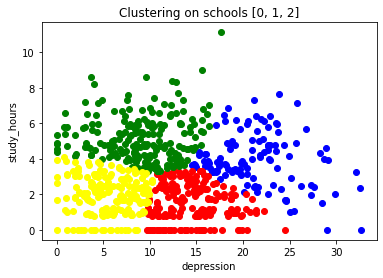

In [146]:
# Visualize clustering across the contract schools
colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'brown']

for i in range(0, number_clusters):
    plt.scatter(brokerClusters[i][varX], brokerClusters[i][varY], color=colors[i])
    
plt.xlabel(varX)
plt.ylabel(varY)
plt.title("Clustering on schools " + str(contractSchoolsIndices))
print("Mean " + varX + ": " + str(brokerdf[varX].mean()))
print("Std " + varX + ": " + str(brokerdf[varX].std()))
print("Mean " + varY + ": " + str(brokerdf[varY].mean()))
print("Std " + varY + ": " + str(brokerdf[varY].std()))

## By mean values

In [147]:
# Determine mean X and Y values of each school

multiXmeans = np.array([])
multiYmeans = np.array([])
for i in range(0, number_schools):
    multiXmeans = np.append(multiXmeans, np.mean(schoolsX[i]))
    multiYmeans = np.append(multiYmeans, np.mean(schoolsY[i]))
    
multiX = np.column_stack((multiXmeans, multiYmeans))
multiX[:10]

array([[11.81315771,  3.05938215],
       [11.37153053,  3.21195453],
       [11.66042539,  3.18907773],
       [11.39979662,  3.02141953],
       [11.45150421,  2.93326381],
       [12.24380585,  3.30102945],
       [12.01768771,  3.2133738 ],
       [11.80047918,  2.88066763],
       [12.31414703,  3.12630345],
       [11.71052133,  3.1081137 ]])

In [148]:
# Normalize data

multiScaler = StandardScaler()
multiXscaled = oneScaler.fit_transform(multiX)
multiXscaled[:10]

array([[ 0.29163769, -0.39359406],
       [-0.74726859,  0.83262133],
       [-0.06765759,  0.64876183],
       [-0.68077401, -0.69869751],
       [-0.55913443, -1.40719995],
       [ 1.30471632,  1.54851138],
       [ 0.77278448,  0.84402797],
       [ 0.26181207, -1.82991238],
       [ 1.47019051,  0.14424854],
       [ 0.05019065, -0.00194144]])

In [149]:
# Perform clustering

multiKmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(multiXscaled)

In [150]:
# Create dataframe for easier handling

multidf = pd.DataFrame(multiX, columns=[varX, varY])
multidf['label'] = multiKmeans.labels_
multidf.head()

,depression,study_hours,label
0,11.813158,3.059382,2
1,11.371531,3.211955,3
2,11.660425,3.189078,3
3,11.399797,3.021420,2
4,11.451504,2.933264,2


In [151]:
# Group by cluster into separate dataframes

multiClusters = list()
for i in range(0, number_clusters):
    multiClusters.append(multidf[multidf['label'] == i])

Mean depression: 11.371530532292718
Std depression: 6.231088779794578
Mean study_hours: 3.211954525456062
Std study_hours: 2.001866999225789


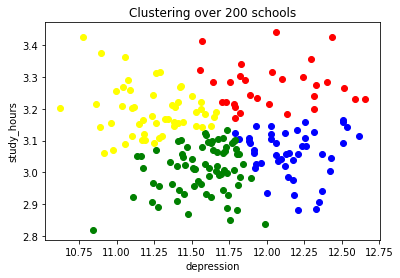

In [152]:
# Visualize multi school clustering

colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'brown']

for i in range(0, number_clusters):
    plt.scatter(multiClusters[i][varX], multiClusters[i][varY], color=colors[i])
    
plt.xlabel(varX)
plt.ylabel(varY)
plt.title("Clustering over " + str(number_schools) + " schools")

print("Mean " + varX + ": " + str(onedf[varX].mean()))
print("Std " + varX + ": " + str(onedf[varX].std()))
print("Mean " + varY + ": " + str(onedf[varY].mean()))
print("Std " + varY + ": " + str(onedf[varY].std()))